In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import sklearn
%matplotlib inline

In [3]:
df = pd.read_csv('all_shot_data_final.csv')

In [4]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION
0,Shot Chart Detail,22300031,130,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,1,49,...,1,1,20231117,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
1,Shot Chart Detail,22300031,148,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,11,...,1,0,20231117,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
2,Shot Chart Detail,22300031,195,1630173,Precious Achiuwa,1610612761,Toronto Raptors,2,8,49,...,1,0,20231117,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
3,Shot Chart Detail,22300031,484,1630173,Precious Achiuwa,1610612761,Toronto Raptors,4,9,30,...,1,1,20231117,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
4,Shot Chart Detail,22300038,141,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,32,...,1,0,20231121,ORL,TOR,Precious Achiuwa,Regular Season,TOR,ORL,AWAY


In [5]:
df['PLAYER_NAME'].value_counts().head(5)

PLAYER_NAME
Luka Doncic                2156
Jalen Brunson              1988
Anthony Edwards            1882
Jayson Tatum               1798
Shai Gilgeous-Alexander    1711
Name: count, dtype: int64

In [6]:
df['TEAM_NAME'].value_counts().head(5)

TEAM_NAME
Dallas Mavericks    9179
Indiana Pacers      9101
Boston Celtics      8989
New York Knicks     8414
Denver Nuggets      8301
Name: count, dtype: int64

<function matplotlib.pyplot.annotate(text: 'str', xy: 'tuple[float, float]', xytext: 'tuple[float, float] | None' = None, xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data', textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None, arrowprops: 'dict[str, Any] | None' = None, annotation_clip: 'bool | None' = None, **kwargs) -> 'Annotation'>

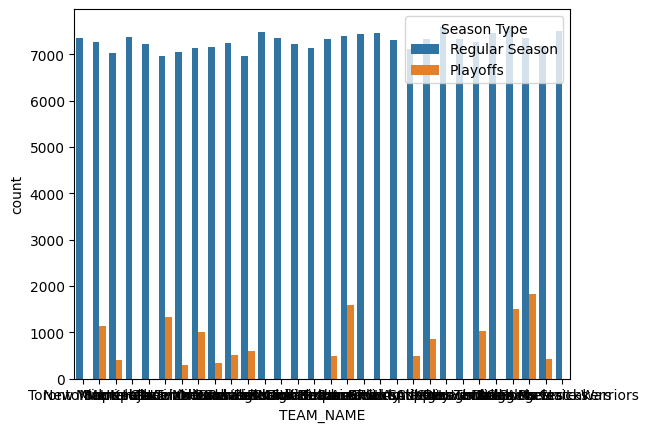

In [7]:
sns.countplot(x='TEAM_NAME',data=df,hue='Season Type')
plt.annotate

In [8]:
byPlayer = df.groupby('PLAYER_NAME').sum()

In [26]:
byPlayer['FG%'] = byPlayer['SHOT_MADE_FLAG']/byPlayer['SHOT_ATTEMPTED_FLAG']

In [36]:
byPlayer.sort_values(by='FG%',inplace=True,ascending=False)
byPlayer.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,FG%
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Dereck Lively II,Shot Chart DetailShot Chart DetailShot Chart D...,10619488469,118838,641914866,629749582122,Dallas MavericksDallas MavericksDallas Maveric...,915,2267,11708,Made ShotMissed ShotMade ShotMissed ShotMade S...,...,285,7912595818,DENDENDENDALDALDALDALDALDALDALDALNOPNOPDALDALD...,DALDALDALLACLACLACLACLACLACLACLACDALDALHOUHOUH...,Dereck Lively IIDereck Lively IIDereck Lively ...,Regular SeasonRegular SeasonRegular SeasonRegu...,DENDENDENDALDALDALDALDALDALDALDALDALDALDALDALD...,DALDALDALLACLACLACLACLACLACLACLACNOPNOPHOUHOUH...,HOMEHOMEHOMEHOMEHOMEHOMEHOMEHOMEHOMEHOMEHOMEAW...,0.728900
Charles Bassey,Shot Chart DetailShot Chart DetailShot Chart D...,892005765,15103,65185840,64424510360,San Antonio SpursSan Antonio SpursSan Antonio ...,102,151,1239,Missed ShotMade ShotMissed ShotMissed ShotMade...,...,29,809244299,SASSASSASOKCOKCOKCOKCOKCSASSASLACLACLACLACPHXP...,MINMINMINSASSASSASSASSASSACDALSASSASSASSASSASS...,Charles BasseyCharles BasseyCharles BasseyChar...,Regular SeasonRegular SeasonRegular SeasonRegu...,MINMINMINSASSASSASSASSASSASSASLACLACLACLACSASS...,SASSASSASOKCOKCOKCOKCOKCSACDALSASSASSASSASPHXP...,AWAYAWAYAWAYAWAYAWAYAWAYAWAYAWAYHOMEHOMEHOMEHO...,0.725000
Jaxson Hayes,Shot Chart DetailShot Chart DetailShot Chart D...,3987223320,66573,288445749,285078456219,Los Angeles LakersLos Angeles LakersLos Angele...,491,1009,5281,Made ShotMade ShotMade ShotMade ShotMade ShotM...,...,126,3582000407,PHXLALLALLALLALLALLALLALLALSACLALORLORLORLORLL...,LALMEMMEMMEMMEMUTAUTAUTAUTALALLACLALLALLALLALP...,Jaxson HayesJaxson HayesJaxson HayesJaxson Hay...,Regular SeasonRegular SeasonRegular SeasonRegu...,PHXMEMMEMMEMMEMLALLALLALLALSACLALLALLALLALLALP...,LALLALLALLALLALUTAUTAUTAUTALALLACORLORLORLORLL...,HOMEAWAYAWAYAWAYAWAYHOMEHOMEHOMEHOMEHOMEHOMEAW...,0.711864
Daniel Gafford,Shot Chart DetailShot Chart DetailShot Chart D...,15907236030,186434,982681965,971199489894,Washington WizardsWashington WizardsWashington...,1459,3891,18251,Made ShotMade ShotMissed ShotMade ShotMade Sho...,...,426,12203205186,MIAWASWASWASWASWASWASWASWASWASWASWASWASWASWASW...,WASCHACHACHACHACHACHACHANYKNYKNYKNYKNYKNYKNYKN...,Daniel GaffordDaniel GaffordDaniel GaffordDani...,Regular SeasonRegular SeasonRegular SeasonRegu...,WASCHACHACHACHACHACHACHANYKNYKNYKNYKNYKNYKNYKN...,MIAWASWASWASWASWASWASWASWASWASWASWASWASWASWASW...,AWAYAWAYAWAYAWAYAWAYAWAYAWAYAWAYAWAYAWAYAWAYAW...,0.706468
Trayce Jackson-Davis,Shot Chart DetailShot Chart DetailShot Chart D...,7403845036,119113,541564376,534723431008,Golden State WarriorsGolden State WarriorsGold...,882,1821,9432,Missed ShotMissed ShotMade ShotMissed ShotMade...,...,233,6719043032,GSWGSWNOPNOPNOPNOPNOPNOPNOPNOPNOPCLECLECLEDEND...,MINSASGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWG...,Trayce Jackson-DavisTrayce Jackson-DavisTrayce...,Regular SeasonRegular SeasonRegular SeasonRegu...,GSWSASNOPNOPNOPNOPNOPNOPNOPNOPNOPCLECLECLEDEND...,MINGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWGSWG...,HOMEAWAYHOMEHOMEHOMEHOMEHOMEHOMEHOMEHOMEHOMEHO...,0.701807


In [ ]:
threept = df[df['']]

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'TEAM_ID',
       'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING',
       'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC',
       'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM',
       'player_name', 'Season Type', 'HOME_TEAM_NAME', 'AWAY_TEAM_NAME',
       'LOCATION', 'FG%'],
      dtype='object')

In [41]:
df[['ACTION_TYPE']]

,ACTION_TYPE
0,Layup Shot
1,Jump Shot
2,Jump Shot
3,Driving Layup Shot
4,Jump Shot
...,...
232536,Tip Layup Shot
232537,Turnaround Jump Shot
232538,Hook Shot
232539,Jump Shot


<Axes: xlabel='ACTION_TYPE', ylabel='count'>

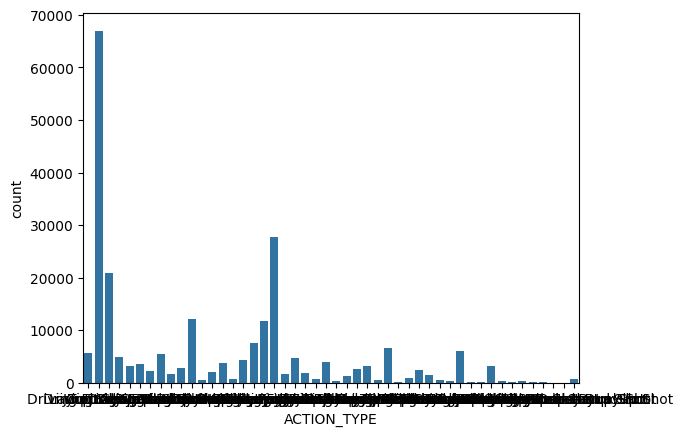

In [44]:
sns.countplot(x='ACTION_TYPE',data=df)

In [45]:
warriors = df[df['TEAM_NAME'] == 'Golden State Warriors']

In [46]:
warriors

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION
45719,Shot Chart Detail,22300005,40,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,17,...,1,0,20231103,OKC,GSW,Stephen Curry,Regular Season,GSW,OKC,AWAY
45720,Shot Chart Detail,22300005,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,0,...,1,1,20231103,OKC,GSW,Stephen Curry,Regular Season,GSW,OKC,AWAY
45721,Shot Chart Detail,22300005,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,15,...,1,1,20231103,OKC,GSW,Stephen Curry,Regular Season,GSW,OKC,AWAY
45722,Shot Chart Detail,22300005,281,201939,Stephen Curry,1610612744,Golden State Warriors,2,3,23,...,1,0,20231103,OKC,GSW,Stephen Curry,Regular Season,GSW,OKC,AWAY
45723,Shot Chart Detail,22300005,292,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,29,...,1,1,20231103,OKC,GSW,Stephen Curry,Regular Season,GSW,OKC,AWAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211196,Shot Chart Detail,22301222,293,203952,Andrew Wiggins,1610612744,Golden State Warriors,2,2,49,...,1,1,20231208,OKC,GSW,Andrew Wiggins,Regular Season,OKC,GSW,HOME
211197,Shot Chart Detail,22301222,352,203952,Andrew Wiggins,1610612744,Golden State Warriors,3,11,25,...,1,0,20231208,OKC,GSW,Andrew Wiggins,Regular Season,OKC,GSW,HOME
211198,Shot Chart Detail,22301222,361,203952,Andrew Wiggins,1610612744,Golden State Warriors,3,10,26,...,1,0,20231208,OKC,GSW,Andrew Wiggins,Regular Season,OKC,GSW,HOME
211199,Shot Chart Detail,22301222,627,203952,Andrew Wiggins,1610612744,Golden State Warriors,4,5,20,...,1,0,20231208,OKC,GSW,Andrew Wiggins,Regular Season,OKC,GSW,HOME


In [47]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


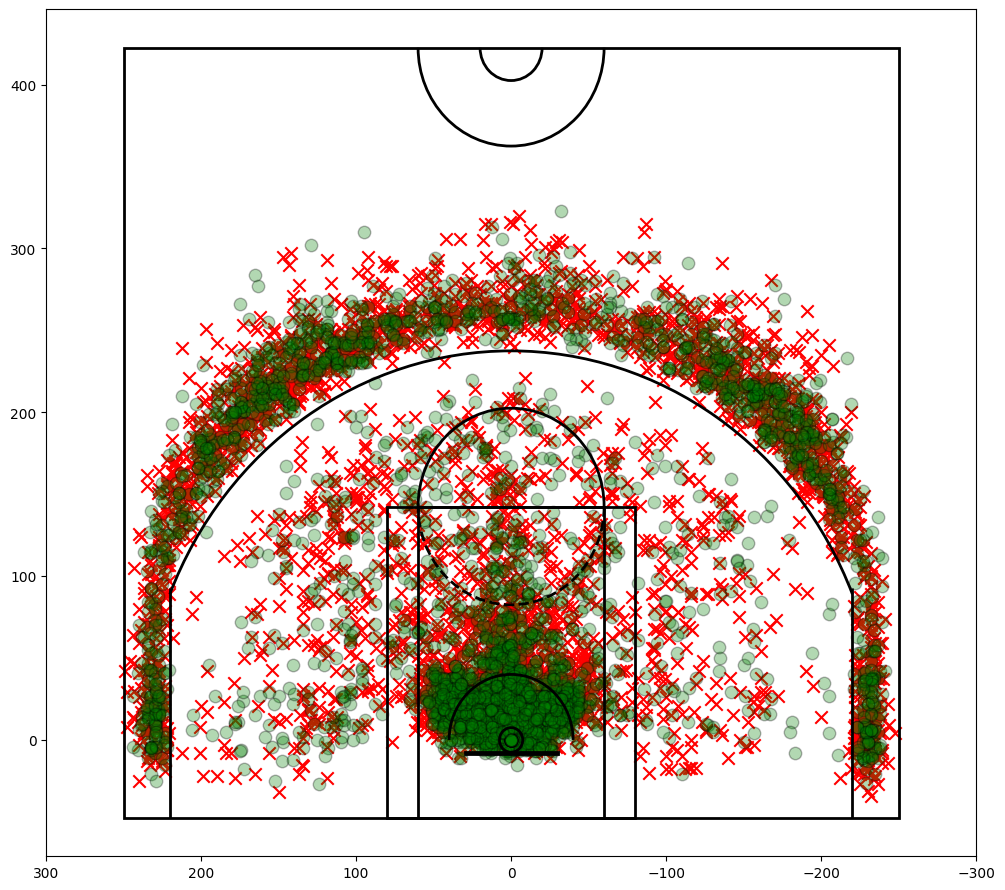

In [52]:
dfnofar = warriors[warriors['SHOT_DISTANCE'] <= 32]
plt.figure(figsize=(12,11))
dfmake = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 1]
dfmiss = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 0]
plt.scatter(dfmiss.LOC_X, dfmiss.LOC_Y,c='red',marker ='x',s=80)
plt.scatter(dfmake.LOC_X, dfmake.LOC_Y,c='green',marker='o',alpha=0.3,s=80,edgecolors='black')

draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [60]:
df['GAME_DATE'] = df['GAME_DATE'].astype(str)
df['GAME_DATE'] = df['GAME_DATE'].apply(lambda x: f'{x[4:6]}-{x[6:]}-{x[:4]}')

In [62]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

In [64]:
lillard = df[df['player_name'] == 'Damian Lillard']

In [67]:
lillardgames = lillard.groupby('GAME_DATE').sum()
lillardgames['FG%'] = lillardgames['SHOT_MADE_FLAG']/lillardgames['SHOT_ATTEMPTED_FLAG']

<Axes: xlabel='GAME_DATE', ylabel='SHOT_ATTEMPTED_FLAG'>

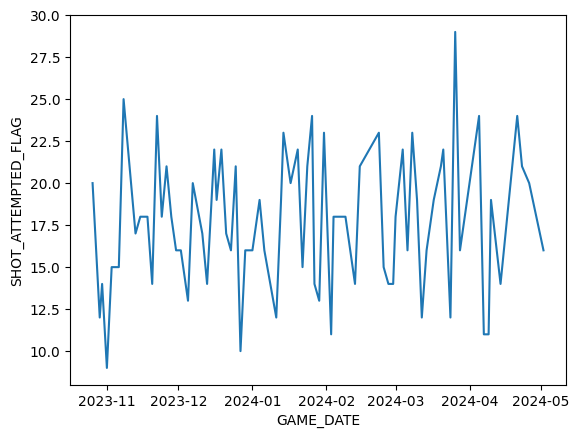

In [71]:
sns.lineplot(x='GAME_DATE',y='SHOT_ATTEMPTED_FLAG',data=lillardgames)

<Axes: xlabel='GAME_DATE', ylabel='FG%'>

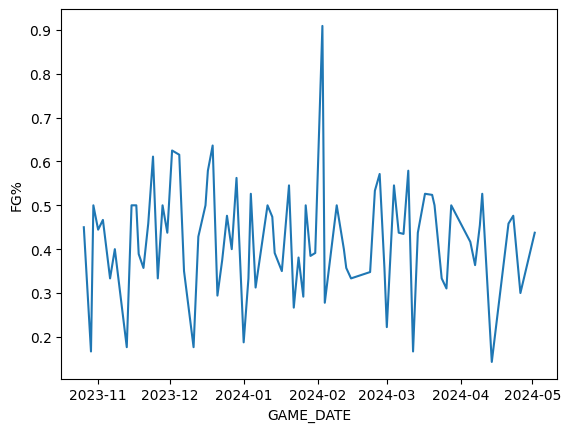

In [72]:
sns.lineplot(x='GAME_DATE',y='FG%',data=lillardgames)

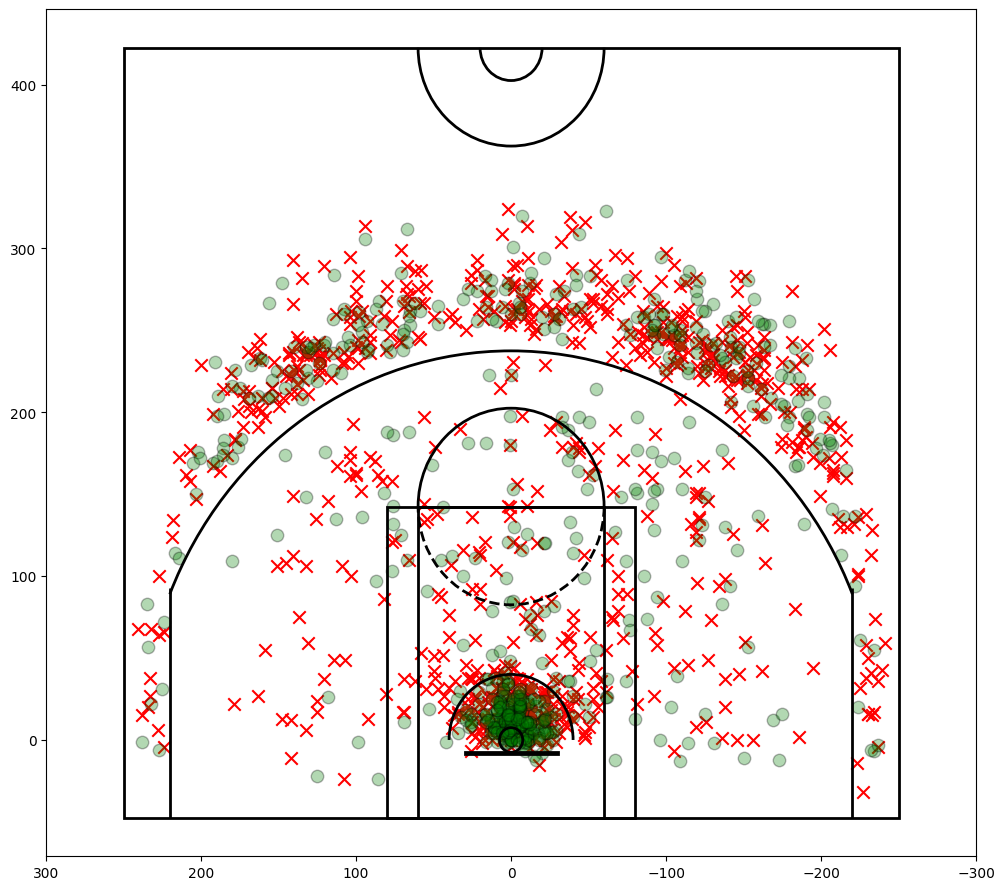

In [73]:
dfnofar = lillard[lillard['SHOT_DISTANCE'] <= 32]
plt.figure(figsize=(12,11))
dfmake = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 1]
dfmiss = dfnofar[dfnofar['SHOT_MADE_FLAG'] == 0]
plt.scatter(dfmiss.LOC_X, dfmiss.LOC_Y,c='red',marker ='x',s=80)
plt.scatter(dfmake.LOC_X, dfmake.LOC_Y,c='green',marker='o',alpha=0.3,s=80,edgecolors='black')

draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [75]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION
0,Shot Chart Detail,22300031,130,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,1,49,...,1,1,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
1,Shot Chart Detail,22300031,148,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,11,...,1,0,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
2,Shot Chart Detail,22300031,195,1630173,Precious Achiuwa,1610612761,Toronto Raptors,2,8,49,...,1,0,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
3,Shot Chart Detail,22300031,484,1630173,Precious Achiuwa,1610612761,Toronto Raptors,4,9,30,...,1,1,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY
4,Shot Chart Detail,22300038,141,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,32,...,1,0,2023-11-21,ORL,TOR,Precious Achiuwa,Regular Season,TOR,ORL,AWAY


In [93]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION'],
      dtype='object')

In [79]:
mostteammatchups = df.groupby(['HTM','VTM','GAME_DATE']).count()

In [83]:
mostteammatchups.sort_values(by='SHOT_ATTEMPTED_FLAG',inplace=True,ascending=False)
mostteammatchups['SHOT_ATTEMPTED_FLAG'].head(5)

HTM  VTM  GAME_DATE 
ATL  BKN  2023-11-22    229
MIL  LAL  2024-03-26    227
ATL  GSW  2024-02-03    226
GSW  BOS  2023-12-19    223
HOU  UTA  2024-01-20    222
Name: SHOT_ATTEMPTED_FLAG, dtype: int64

In [84]:
mostshotsinggame = df.groupby(['HTM','VTM','GAME_DATE','PLAYER_NAME']).count()

In [91]:
mostshotsinggame.sort_values(by='SHOT_ATTEMPTED_FLAG',inplace=True,ascending=False)
mostshotsinggame['SHOT_ATTEMPTED_FLAG'].head(10)

HTM  VTM  GAME_DATE   PLAYER_NAME     
SAS  NYK  2024-03-29  Jalen Brunson       47
ATL  BOS  2024-03-28  Dejounte Murray     44
PHI  SAS  2024-01-22  Joel Embiid         41
SAS  PHI  2024-04-07  Tyrese Maxey        41
ATL  GSW  2024-02-03  Stephen Curry       38
IND  PHX  2024-01-26  Devin Booker        37
MEM  DEN  2024-04-14  GG Jackson II       36
ORL  CLE  2024-05-03  Donovan Mitchell    36
NYK  IND  2024-05-14  Jalen Brunson       35
GSW  LAL  2024-01-27  Stephen Curry       35
Name: SHOT_ATTEMPTED_FLAG, dtype: int64

<Axes: xlabel='PLAYER_NAME', ylabel='SHOT_ATTEMPTED_FLAG'>

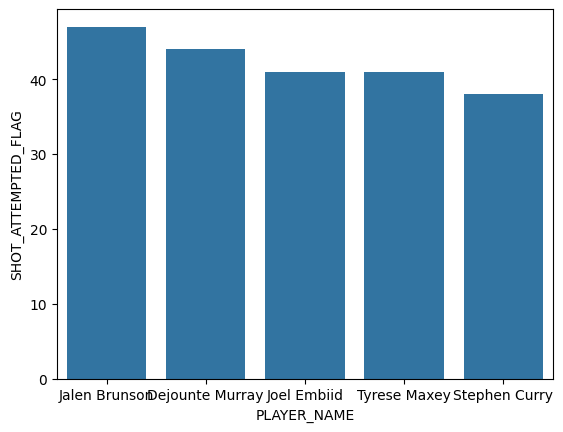

In [95]:
top10shots = mostshotsinggame.head(5)
sns.barplot(data=top10shots,x='PLAYER_NAME',y='SHOT_ATTEMPTED_FLAG')

In [107]:
df['SHOT_VALUE'] = df['SHOT_TYPE'].apply(lambda x: int(x[:1]))

In [150]:
threeptleaders = df[df['SHOT_VALUE'] == 3]

In [151]:
threeptleaders = threeptleaders.groupby('PLAYER_NAME').count()
threeptleaders.sort_values(by='SHOT_VALUE',inplace=True,ascending=False)
threeptleaders['player_name'].head(5)

PLAYER_NAME
Luka Doncic         955
Stephen Curry       876
Donte DiVincenzo    811
Jayson Tatum        747
Klay Thompson       692
Name: player_name, dtype: int64

In [162]:
threeptleaders['player_name'].tail(5)

PLAYER_NAME
Usman Garuba        1
Tristan Thompson    1
Clint Capela        1
Marques Bolden      1
Ty Jerome           1
Name: player_name, dtype: int64

In [158]:
threeptleadersteam = df[df['SHOT_VALUE'] == 3]
threeptleadersteam = threeptleadersteam.groupby('TEAM_NAME').count()
threeptleadersteam.sort_values(by='SHOT_VALUE',inplace=True,ascending=False)
threeptleadersteam['SHOT_VALUE'].head(5)

TEAM_NAME
Boston Celtics         4246
Dallas Mavericks       3970
Indiana Pacers         3450
Cleveland Cavaliers    3410
New York Knicks        3349
Name: SHOT_VALUE, dtype: int64

In [159]:
threeptleadersteam['SHOT_VALUE'].tail(5)

TEAM_NAME
Portland Trail Blazers    2723
Los Angeles Lakers        2719
Toronto Raptors           2712
Chicago Bulls             2630
Detroit Pistons           2602
Name: SHOT_VALUE, dtype: int64

In [161]:
threeptleadersteam

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,SHOT_VALUE
TEAM_NAME,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,4246,4246,4246,4246,4246,4246,4246,4246,4246,4246,...,4246,4246,4246,4246,4246,4246,4246,4246,4246,4246
Dallas Mavericks,3970,3970,3970,3970,3970,3970,3970,3970,3970,3970,...,3970,3970,3970,3970,3970,3970,3970,3970,3970,3970
Indiana Pacers,3450,3450,3450,3450,3450,3450,3450,3450,3450,3450,...,3450,3450,3450,3450,3450,3450,3450,3450,3450,3450
Cleveland Cavaliers,3410,3410,3410,3410,3410,3410,3410,3410,3410,3410,...,3410,3410,3410,3410,3410,3410,3410,3410,3410,3410
New York Knicks,3349,3349,3349,3349,3349,3349,3349,3349,3349,3349,...,3349,3349,3349,3349,3349,3349,3349,3349,3349,3349
Milwaukee Bucks,3311,3311,3311,3311,3311,3311,3311,3311,3311,3311,...,3311,3311,3311,3311,3311,3311,3311,3311,3311,3311
Sacramento Kings,3219,3219,3219,3219,3219,3219,3219,3219,3219,3219,...,3219,3219,3219,3219,3219,3219,3219,3219,3219,3219
Minnesota Timberwolves,3202,3202,3202,3202,3202,3202,3202,3202,3202,3202,...,3202,3202,3202,3202,3202,3202,3202,3202,3202,3202
Golden State Warriors,3191,3191,3191,3191,3191,3191,3191,3191,3191,3191,...,3191,3191,3191,3191,3191,3191,3191,3191,3191,3191


<Axes: xlabel='ACTION_TYPE', ylabel='Count'>

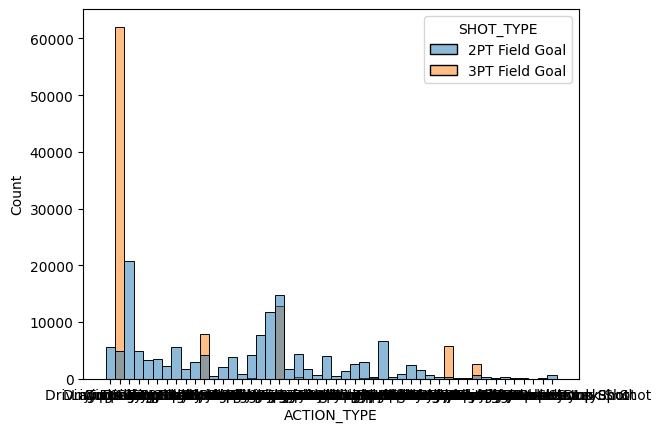

In [166]:
sns.histplot(x='ACTION_TYPE',data=df,hue='SHOT_TYPE')

In [168]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,SHOT_VALUE
0,Shot Chart Detail,22300031,130,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,1,49,...,1,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,2
1,Shot Chart Detail,22300031,148,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,11,...,0,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,3
2,Shot Chart Detail,22300031,195,1630173,Precious Achiuwa,1610612761,Toronto Raptors,2,8,49,...,0,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,3
3,Shot Chart Detail,22300031,484,1630173,Precious Achiuwa,1610612761,Toronto Raptors,4,9,30,...,1,2023-11-17,TOR,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,2
4,Shot Chart Detail,22300038,141,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,32,...,0,2023-11-21,ORL,TOR,Precious Achiuwa,Regular Season,TOR,ORL,AWAY,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232536,Shot Chart Detail,42300176,337,1627826,Ivica Zubac,1610612746,LA Clippers,2,0,36,...,1,2024-05-03,DAL,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2
232537,Shot Chart Detail,42300176,351,1627826,Ivica Zubac,1610612746,LA Clippers,3,11,41,...,0,2024-05-03,DAL,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2
232538,Shot Chart Detail,42300176,524,1627826,Ivica Zubac,1610612746,LA Clippers,4,11,4,...,1,2024-05-03,DAL,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2
232539,Shot Chart Detail,42300176,532,1627826,Ivica Zubac,1610612746,LA Clippers,4,9,43,...,0,2024-05-03,DAL,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2


In [171]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

<Axes: >

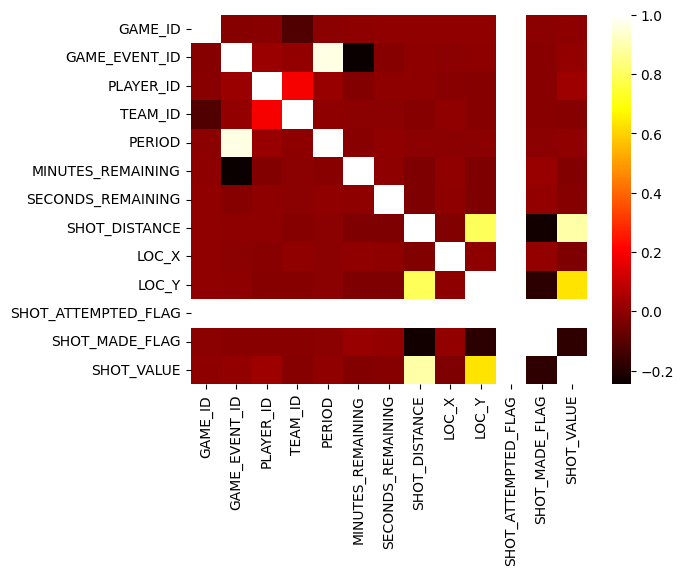

In [173]:
sns.heatmap(corr,cmap='hot')

In [174]:
playershottypes = df.groupby(['PLAYER_NAME','ACTION_TYPE']).count()

In [181]:
playershottypes.sort_values(by=['ACTION_TYPE','SHOT_VALUE'],inplace=True,ascending=False)

In [186]:
playershottypes

,,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,SHOT_VALUE
PLAYER_NAME,ACTION_TYPE,,,,,,,,,,,,,,,,,,,,,
DeMar DeRozan,Turnaround Jump Shot,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
Kristaps Porzingis,Turnaround Jump Shot,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
Paolo Banchero,Turnaround Jump Shot,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
Nikola Jokic,Turnaround Jump Shot,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
Bobby Portis,Turnaround Jump Shot,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Keyonte George,Alley Oop Dunk Shot,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kris Murray,Alley Oop Dunk Shot,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Patrick Williams,Alley Oop Dunk Shot,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [187]:
playershottypes = playershottypes.reset_index()

In [189]:
df['ACTION_TYPE'].unique()

array(['Layup Shot', 'Jump Shot', 'Driving Layup Shot', 'Tip Layup Shot',
       'Cutting Dunk Shot', 'Driving Floating Bank Jump Shot',
       'Driving Dunk Shot', 'Cutting Layup Shot', 'Alley Oop Dunk Shot',
       'Running Dunk Shot', 'Step Back Jump shot', 'Putback Dunk Shot',
       'Hook Shot', 'Turnaround Fadeaway shot', 'Alley Oop Layup shot',
       'Floating Jump shot', 'Running Layup Shot',
       'Driving Floating Jump Shot', 'Pullup Jump shot',
       'Driving Hook Shot', 'Fadeaway Jump Shot',
       'Running Finger Roll Layup Shot', 'Cutting Finger Roll Layup Shot',
       'Putback Layup Shot', 'Finger Roll Layup Shot',
       'Reverse Layup Shot', 'Turnaround Hook Shot',
       'Turnaround Jump Shot', 'Jump Bank Shot',
       'Driving Finger Roll Layup Shot', 'Turnaround Bank Hook Shot',
       'Tip Dunk Shot', 'Driving Reverse Layup Shot', 'Dunk Shot',
       'Running Alley Oop Dunk Shot', 'Driving Bank Hook Shot',
       'Running Jump Shot', 'Step Back Bank Jump Shot',

In [196]:
playershottypes[playershottypes['ACTION_TYPE'] == 'Floating Jump shot'].head(5)

,PLAYER_NAME,ACTION_TYPE,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,SHOT_VALUE
7951,Nikola Jokic,Floating Jump shot,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133
7952,Nikola Vucevic,Floating Jump shot,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
7953,Isaiah Hartenstein,Floating Jump shot,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
7954,Alperen Sengun,Floating Jump shot,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
7955,Jarrett Allen,Floating Jump shot,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67


In [191]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION', 'SHOT_VALUE'],
      dtype='object')

In [195]:
df[['SHOT_ZONE_BASIC']]

,SHOT_ZONE_BASIC
0,Restricted Area
1,Right Corner 3
2,Left Corner 3
3,Restricted Area
4,Above the Break 3
...,...
232536,Restricted Area
232537,In The Paint (Non-RA)
232538,In The Paint (Non-RA)
232539,Mid-Range


/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_97930/4202999076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_efficiency.values, y=player_efficiency.index, palette='viridis')


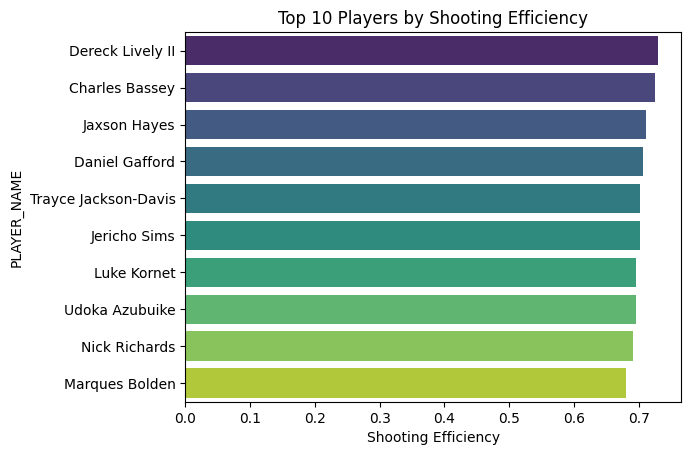

In [ ]:
import seaborn as sns

player_efficiency = df.groupby('PLAYER_NAME')['SHOT_MADE_FLAG'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=player_efficiency.values, y=player_efficiency.index, palette='viridis')
plt.title('Top 10 Players by Shooting Efficiency')
plt.xlabel('Shooting Efficiency')
plt.show()


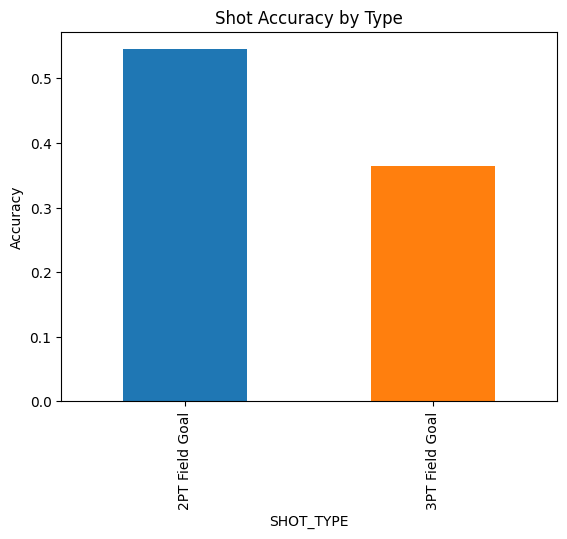

In [198]:
shot_type_dist = df.groupby('SHOT_TYPE')['SHOT_MADE_FLAG'].mean()
shot_type_dist.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Shot Accuracy by Type')
plt.ylabel('Accuracy')
plt.show()


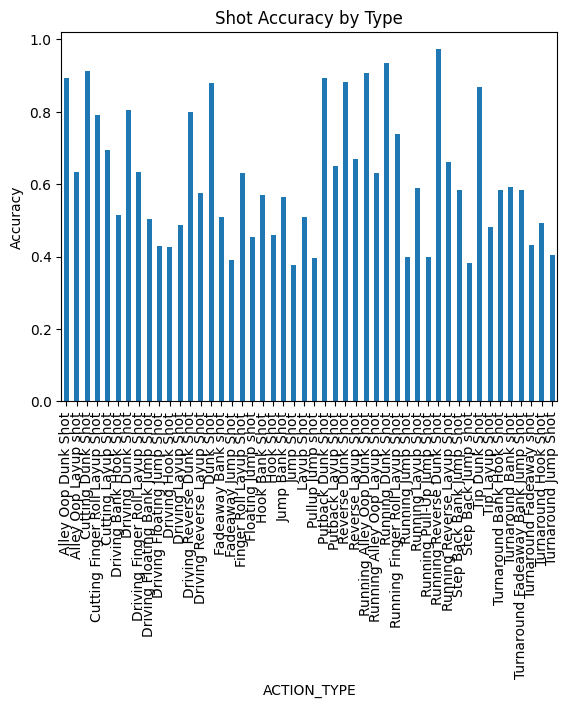

In [199]:
shot_type_dist = df.groupby('ACTION_TYPE')['SHOT_MADE_FLAG'].mean()
shot_type_dist.plot(kind='bar')
plt.title('Shot Accuracy by Type')
plt.ylabel('Accuracy')
plt.show()

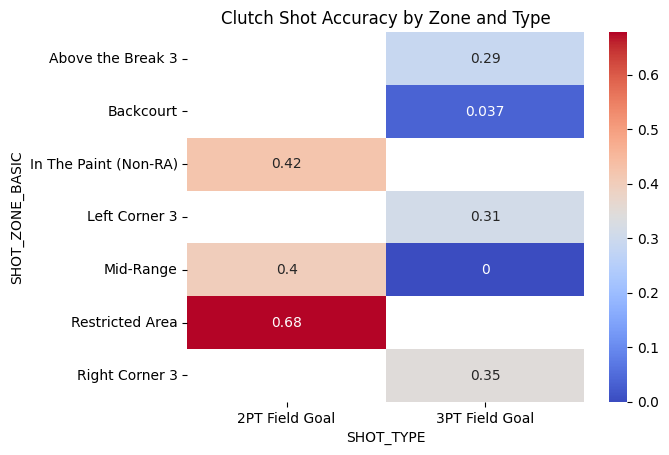

In [200]:
clutch_shots = df[(df['PERIOD'] == 4) & (df['MINUTES_REMAINING'] < 2)]
clutch_heatmap = clutch_shots.pivot_table(index='SHOT_ZONE_BASIC', columns='SHOT_TYPE', values='SHOT_MADE_FLAG', aggfunc='mean')

sns.heatmap(clutch_heatmap, annot=True, cmap='coolwarm')
plt.title('Clutch Shot Accuracy by Zone and Type')
plt.show()


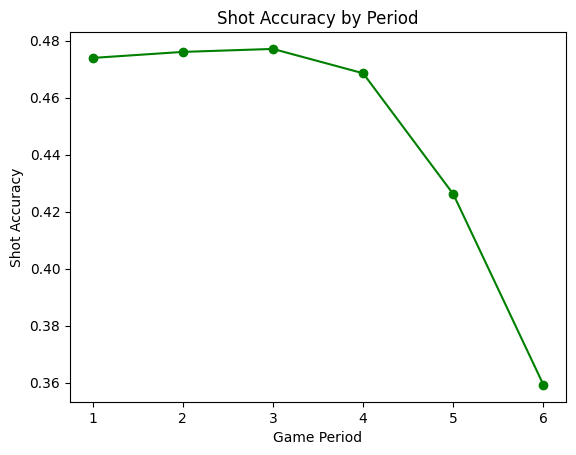

In [201]:
period_trends = df.groupby('PERIOD')['SHOT_MADE_FLAG'].mean()

plt.plot(period_trends.index, period_trends.values, marker='o', linestyle='-', color='green')
plt.title('Shot Accuracy by Period')
plt.xlabel('Game Period')
plt.ylabel('Shot Accuracy')
plt.xticks(period_trends.index)
plt.show()

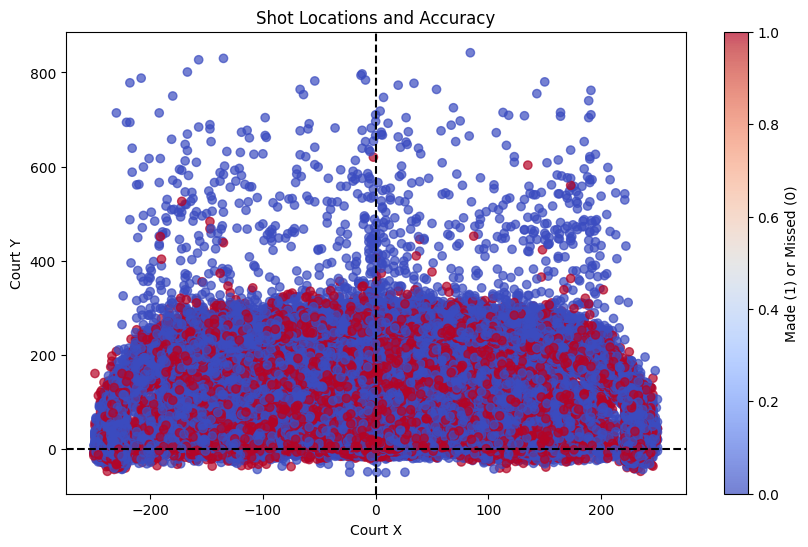

In [202]:
plt.figure(figsize=(10, 6))
plt.scatter(df['LOC_X'], df['LOC_Y'], c=df['SHOT_MADE_FLAG'], cmap='coolwarm', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title('Shot Locations and Accuracy')
plt.xlabel('Court X')
plt.ylabel('Court Y')
plt.colorbar(label='Made (1) or Missed (0)')
plt.show()


In [215]:
fg = df.groupby('PLAYER_NAME')['SHOT_MADE_FLAG'].mean().reset_index().sort_values(by='SHOT_MADE_FLAG',ascending=False).head(5)

In [216]:
fg

,PLAYER_NAME,SHOT_MADE_FLAG
137,Dereck Lively II,0.728900
76,Charles Bassey,0.725000
262,Jaxson Hayes,0.711864
109,Daniel Gafford,0.706468
530,Trayce Jackson-Davis,0.701807


In [217]:
fg = df.groupby('TEAM_NAME')['SHOT_MADE_FLAG'].mean().reset_index().sort_values(by='SHOT_MADE_FLAG',ascending=False).head(5)

In [218]:
fg

,TEAM_NAME,SHOT_MADE_FLAG
11,Indiana Pacers,0.507197
13,Los Angeles Lakers,0.498421
20,Oklahoma City Thunder,0.494622
23,Phoenix Suns,0.491854
7,Denver Nuggets,0.491146


In [244]:
threept = df[df['SHOT_VALUE'] == 3]

threept_stats = (
    threept.groupby('PLAYER_NAME')['SHOT_MADE_FLAG']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'SHOT_MADE_PCT', 'count': 'ATTEMPTS'})
)

# Filter players with at least 100 attempts
threept_stats = threept_stats[threept_stats['ATTEMPTS'] >= 300]

# Sort by shot percentage and take the top 20
top_threept = threept_stats.sort_values(by='SHOT_MADE_PCT', ascending=False).head(20)


In [245]:
top_threept

,PLAYER_NAME,SHOT_MADE_PCT,ATTEMPTS
181,Grayson Allen,0.457778,450
413,Norman Powell,0.435835,413
388,Mike Conley,0.434511,481
294,Jrue Holiday,0.422983,409
61,CJ McCollum,0.419795,586
461,Sam Hauser,0.417910,536
194,Isaiah Joe,0.415816,392
363,Malik Beasley,0.414462,567
321,Kevin Durant,0.412888,419
308,Kawhi Leonard,0.410557,341


In [238]:
threept = threept.groupby('TEAM_NAME')['SHOT_MADE_FLAG'].mean().reset_index().sort_values(by='SHOT_MADE_FLAG',ascending=False)

In [240]:
threept.head(5)

,TEAM_NAME,SHOT_MADE_FLAG
20,Oklahoma City Thunder,0.385056
1,Boston Celtics,0.382949
17,Minnesota Timberwolves,0.382261
23,Phoenix Suns,0.381261
12,LA Clippers,0.380543


In [241]:
threept.tail(5)

,TEAM_NAME,SHOT_MADE_FLAG
21,Orlando Magic,0.348090
27,Toronto Raptors,0.347345
26,San Antonio Spurs,0.347301
14,Memphis Grizzlies,0.345819
24,Portland Trail Blazers,0.344840


In [257]:
brandinpodz = df[df['PLAYER_NAME'] == 'Brandin Podziemski']

In [259]:
shotdist = df.groupby('PLAYER_NAME')['SHOT_DISTANCE'].agg(['mean', 'count']).reset_index()

In [261]:
shotdist = shotdist.reset_index()
shotdist.sort_values(by='mean',inplace=True,ascending=False)

In [267]:
shotdist = shotdist[shotdist['count'] >= 100]
shotdist.head(10)


,level_0,index,PLAYER_NAME,mean,count
66,66,66,Caleb Houstan,23.471154,208
0,0,0,AJ Green,23.353774,212
221,221,221,Jacob Gilyard,23.326667,150
487,487,487,Sam Merrill,23.248815,422
122,122,122,Davis Bertans,23.175214,234
486,486,486,Sam Hauser,22.264798,642
179,179,179,Garrison Mathews,22.163717,226
397,397,397,Matt Ryan,22.035088,114
130,130,130,Dean Wade,22.024490,245
367,367,367,Lindy Waters III,21.961905,105


In [268]:
shotdist.tail(10)


,level_0,index,PLAYER_NAME,mean,count
21,21,21,Andre Drummond,2.385417,480
109,109,109,Daniel Gafford,2.338308,603
479,479,479,Rudy Gobert,2.266017,718
387,387,387,Mark Williams,2.125828,151
87,87,87,Clint Capela,2.116505,618
530,530,530,Trayce Jackson-Davis,2.087349,332
161,161,161,Dwight Powell,1.954128,109
137,137,137,Dereck Lively II,1.946292,391
374,374,374,Luke Kornet,1.674107,224
409,409,409,Mitchell Robinson,0.709220,141


In [269]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION', 'SHOT_VALUE'],
      dtype='object')

In [279]:
nba_team_abv = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

df['TEAM_ABV'] = df['TEAM_NAME'].map(nba_team_abv)

In [280]:
null_team_abv_rows = df[df['TEAM_ABV'].isnull()]

null_team_abv_rows

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,GAME_DATE,HTM,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,SHOT_VALUE,TEAM_ABV


In [ ]:
def findOpponent(row):
    team = row['TEAM_ABV']
    home = row['HTM']
    away = row['VTM']
    opp = ''
    if team == home:
        opp = away
    else:
        opp = home
    return opp

In [288]:
df['OPP_TEAM_ABV'] = df.apply(findOpponent,axis=1)

In [290]:
df.drop(columns='OPP_TEAM',inplace=True)

In [292]:
nba_abv_team = {abv: team for team, abv in nba_team_abv.items()}

df['OPP_TEAM'] = df['OPP_TEAM_ABV'].map(nba_abv_team)

In [293]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,VTM,player_name,Season Type,HOME_TEAM_NAME,AWAY_TEAM_NAME,LOCATION,SHOT_VALUE,TEAM_ABV,OPP_TEAM_ABV,OPP_TEAM
0,Shot Chart Detail,22300031,130,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,1,49,...,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,2,TOR,BOS,Boston Celtics
1,Shot Chart Detail,22300031,148,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,11,...,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,3,TOR,BOS,Boston Celtics
2,Shot Chart Detail,22300031,195,1630173,Precious Achiuwa,1610612761,Toronto Raptors,2,8,49,...,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,3,TOR,BOS,Boston Celtics
3,Shot Chart Detail,22300031,484,1630173,Precious Achiuwa,1610612761,Toronto Raptors,4,9,30,...,BOS,Precious Achiuwa,Regular Season,BOS,TOR,AWAY,2,TOR,BOS,Boston Celtics
4,Shot Chart Detail,22300038,141,1630173,Precious Achiuwa,1610612761,Toronto Raptors,1,0,32,...,TOR,Precious Achiuwa,Regular Season,TOR,ORL,AWAY,3,TOR,ORL,Orlando Magic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232536,Shot Chart Detail,42300176,337,1627826,Ivica Zubac,1610612746,LA Clippers,2,0,36,...,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2,LAC,DAL,Dallas Mavericks
232537,Shot Chart Detail,42300176,351,1627826,Ivica Zubac,1610612746,LA Clippers,3,11,41,...,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2,LAC,DAL,Dallas Mavericks
232538,Shot Chart Detail,42300176,524,1627826,Ivica Zubac,1610612746,LA Clippers,4,11,4,...,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2,LAC,DAL,Dallas Mavericks
232539,Shot Chart Detail,42300176,532,1627826,Ivica Zubac,1610612746,LA Clippers,4,9,43,...,LAC,Ivica Zubac,Playoffs,LAC,DAL,AWAY,2,LAC,DAL,Dallas Mavericks


In [294]:
againstteam = df.groupby('OPP_TEAM')['SHOT_MADE_FLAG'].mean()

In [300]:
againstteam = againstteam.reset_index()
againstteam.sort_values(by='SHOT_MADE_FLAG',inplace=True,ascending=False)
againstteam.head(5)

,OPP_TEAM,SHOT_MADE_FLAG
29,Washington Wizards,0.495865
0,Atlanta Hawks,0.494861
3,Charlotte Hornets,0.494368
11,Indiana Pacers,0.491972
27,Toronto Raptors,0.490770


In [301]:
againstteam.tail(5)

,OPP_TEAM,SHOT_MADE_FLAG
10,Houston Rockets,0.462773
5,Cleveland Cavaliers,0.461096
1,Boston Celtics,0.454894
17,Minnesota Timberwolves,0.452724
20,Oklahoma City Thunder,0.452087


In [315]:
againstteamplayers = df.groupby(['OPP_TEAM','PLAYER_NAME'])['SHOT_MADE_FLAG'].agg(['mean', 'count']).reset_index()

In [319]:
# againstteamplayers = againstteamplayers.reset_index()
# againstteamplayers.sort_values(by=['mean','count'],inplace=True,ascending=False)
# againstteamplayers = againstteamplayers[againstteamplayers['count'] >= 5]
againstteamplayers.head(10)

,index,OPP_TEAM,PLAYER_NAME,mean,count
1694,1694,Chicago Bulls,Daniel Gafford,1.0,9
2660,2660,Dallas Mavericks,Mark Williams,1.0,8
9173,9173,Philadelphia 76ers,Walker Kessler,1.0,8
263,263,Atlanta Hawks,Luke Kornet,1.0,7
2179,2179,Cleveland Cavaliers,Jaxson Hayes,1.0,7
6609,6609,Milwaukee Bucks,Kyle Anderson,1.0,7
6914,6914,Minnesota Timberwolves,Isaiah Jackson,1.0,7
7462,7462,New Orleans Pelicans,Mason Plumlee,1.0,7
8362,8362,Oklahoma City Thunder,Tre Mann,1.0,7
176,176,Atlanta Hawks,Jarred Vanderbilt,1.0,6


In [334]:
sga = againstteamplayers[againstteamplayers['PLAYER_NAME'] == 'Damian Lillard']

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_97930/1263748715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OPP_TEAM', y='mean', data=sga,palette=['orange','red','blue','purple','green'])
/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_97930/1263748715.py:4: UserWarning: 
The palette list has fewer values (5) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='OPP_TEAM', y='mean', data=sga,palette=['orange','red','blue','purple','green'])


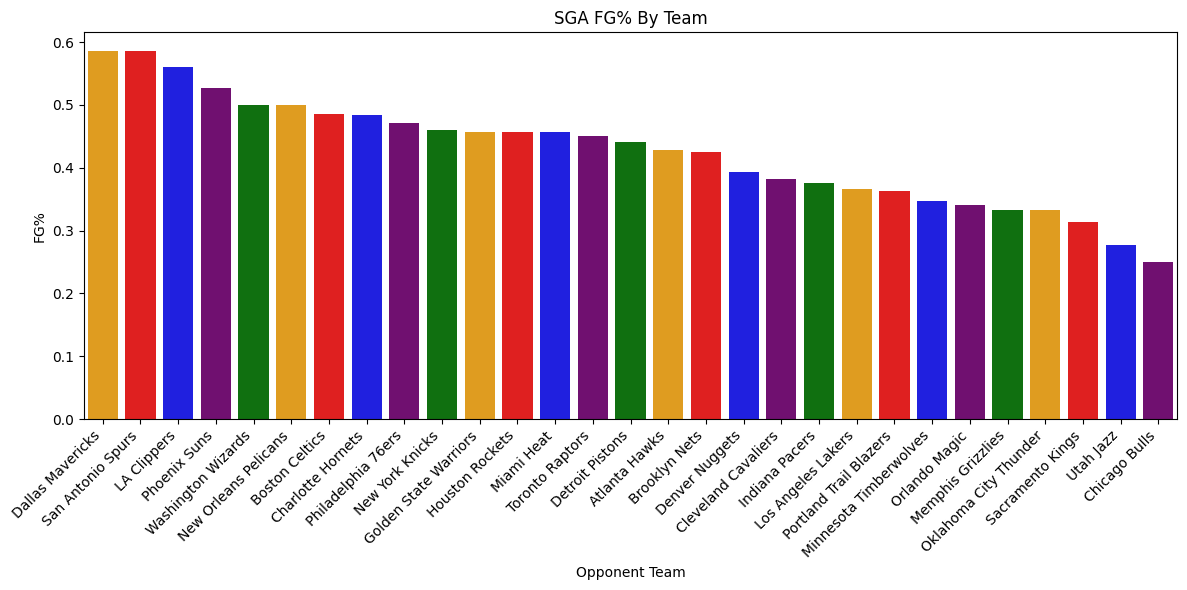

In [339]:
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(x='OPP_TEAM', y='mean', data=sga,palette=['orange','red','blue','purple','green'])

# Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Opponent Team')
plt.ylabel('FG%')
plt.title('SGA FG% By Team')

# Show gridlines for better visualization
# plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [297]:
forteam = df.groupby('TEAM_NAME')['SHOT_MADE_FLAG'].mean()
forteam

TEAM_NAME
Atlanta Hawks             0.465322
Boston Celtics            0.483702
Brooklyn Nets             0.456275
Charlotte Hornets         0.459975
Chicago Bulls             0.469819
Cleveland Cavaliers       0.475396
Dallas Mavericks          0.478266
Denver Nuggets            0.491146
Detroit Pistons           0.463378
Golden State Warriors     0.476647
Houston Rockets           0.459177
Indiana Pacers            0.507197
LA Clippers               0.485068
Los Angeles Lakers        0.498421
Memphis Grizzlies         0.435053
Miami Heat                0.463651
Milwaukee Bucks           0.486497
Minnesota Timberwolves    0.482289
New Orleans Pelicans      0.482207
New York Knicks           0.463751
Oklahoma City Thunder     0.494622
Orlando Magic             0.472060
Philadelphia 76ers        0.463032
Phoenix Suns              0.491854
Portland Trail Blazers    0.438690
Sacramento Kings          0.476593
San Antonio Spurs         0.462345
Toronto Raptors           0.471180
Utah Jazz 

In [352]:
madeshots = df[df['SHOT_MADE_FLAG'] == 1]
againstteamplayerpts = madeshots.groupby(['OPP_TEAM','PLAYER_NAME','Season Type'])['SHOT_VALUE'].sum().reset_index()

In [353]:
againstteamplayerpts.sort_values(by='SHOT_VALUE',inplace=True,ascending=False)
againstteamplayerpts.head(10)

,OPP_TEAM,PLAYER_NAME,Season Type,SHOT_VALUE
8629,Philadelphia 76ers,Jalen Brunson,Playoffs,164
6825,Minnesota Timberwolves,Nikola Jokic,Playoffs,164
4379,Indiana Pacers,Jalen Brunson,Playoffs,164
2736,Denver Nuggets,Anthony Edwards,Playoffs,161
8199,Orlando Magic,Donovan Mitchell,Playoffs,159
6274,Milwaukee Bucks,Jalen Brunson,Regular Season,154
7687,New York Knicks,Tyrese Maxey,Playoffs,154
2664,Dallas Mavericks,Shai Gilgeous-Alexander,Playoffs,153
2217,Cleveland Cavaliers,Paolo Banchero,Playoffs,152
4326,Indiana Pacers,Donte DiVincenzo,Playoffs,143


In [355]:
ag2 = againstteamplayerpts.head(10)

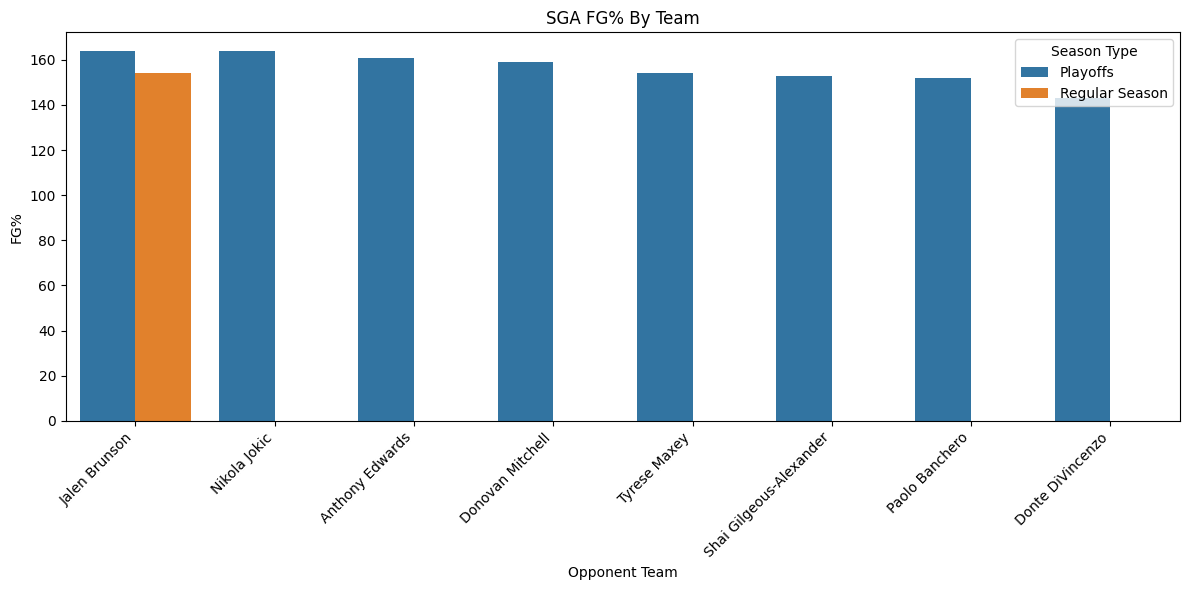

In [ ]:
plt.figure(figsize=(12, 6))

# Create the barplot
sns.barplot(x='PLAYER_NAME', y='SHOT_VALUE', data=againstteamplayerpts.head(10),hue='Season Type')

# Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Opponent Team')
plt.ylabel('FG%')
plt.title('SGA FG% By Team')

# Show gridlines for better visualization
# plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [346]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION', 'SHOT_VALUE', 'TEAM_ABV', 'OPP_TEAM_ABV',
       'OPP_TEAM'],
      dtype='object')

In [348]:
df[['Season Type']]

,Season Type
0,Regular Season
1,Regular Season
2,Regular Season
3,Regular Season
4,Regular Season
...,...
232536,Playoffs
232537,Playoffs
232538,Playoffs
232539,Playoffs


In [357]:
playReg = df.groupby(['PLAYER_NAME','Season Type'])['SHOT_MADE_FLAG'].mean()

In [358]:
playReg

PLAYER_NAME      Season Type   
AJ Green         Playoffs          0.375000
                 Regular Season    0.423469
AJ Griffin       Regular Season    0.290323
AJ Lawson        Playoffs          0.444444
                 Regular Season    0.446281
                                     ...   
Zavier Simpson   Regular Season    0.314815
Zeke Nnaji       Playoffs          0.666667
                 Regular Season    0.463087
Ziaire Williams  Regular Season    0.396825
Zion Williamson  Regular Season    0.570384
Name: SHOT_MADE_FLAG, Length: 775, dtype: float64

In [372]:
byGame = madeshots.groupby(['PLAYER_NAME','OPP_TEAM','GAME_DATE'])['SHOT_VALUE'].sum().reset_index()

In [373]:
byGame.sort_values(by='SHOT_VALUE',inplace=True,ascending=False)
byGame.head(10)

,PLAYER_NAME,OPP_TEAM,GAME_DATE,SHOT_VALUE
15875,Luka Doncic,Atlanta Hawks,2024-01-26,58
10246,Jalen Brunson,San Antonio Spurs,2024-03-29,55
21523,Stephen Curry,Atlanta Hawks,2024-02-03,54
13653,Karl-Anthony Towns,Charlotte Hornets,2024-01-22,52
6553,Devin Booker,Indiana Pacers,2024-01-26,50
12083,Joel Embiid,San Antonio Spurs,2024-01-22,49
23115,Tyrese Maxey,Indiana Pacers,2023-11-12,47
6910,Donovan Mitchell,Orlando Magic,2024-05-03,47
6576,Devin Booker,New Orleans Pelicans,2024-04-01,46
15900,Luka Doncic,Houston Rockets,2024-03-31,45


In [375]:
avgvsTeam = byGame.groupby(['PLAYER_NAME','OPP_TEAM'])['SHOT_VALUE'].agg(['mean', 'count']).reset_index()

In [380]:
avgvsTeam.sort_values(by=['mean','count'],inplace=True,ascending=False)
avgvsTeam.head(10)

,PLAYER_NAME,OPP_TEAM,mean,count
5584,Joel Embiid,San Antonio Spurs,49.0,1
2960,Desmond Bane,Detroit Pistons,42.0,1
7380,Luka Doncic,Atlanta Hawks,40.0,2
6342,Karl-Anthony Towns,Charlotte Hornets,40.0,2
3769,Giannis Antetokounmpo,Dallas Mavericks,39.5,2
4684,Jalen Brunson,Phoenix Suns,39.0,2
4687,Jalen Brunson,San Antonio Spurs,38.0,2
583,Anthony Edwards,Indiana Pacers,37.0,2
517,Anfernee Simons,Washington Wizards,37.0,1
9973,Stephen Curry,Atlanta Hawks,36.5,2


In [381]:
curryvsTeams = avgvsTeam[avgvsTeam['PLAYER_NAME'] == 'Stephen Curry']

In [382]:
curryvsTeams

,PLAYER_NAME,OPP_TEAM,mean,count
9973,Stephen Curry,Atlanta Hawks,36.500000,2
9983,Stephen Curry,Indiana Pacers,32.500000,2
9975,Stephen Curry,Brooklyn Nets,31.000000,2
9985,Stephen Curry,Los Angeles Lakers,30.000000,4
9998,Stephen Curry,San Antonio Spurs,30.000000,2
9990,Stephen Curry,New Orleans Pelicans,26.333333,3
9997,Stephen Curry,Sacramento Kings,26.250000,4
9988,Stephen Curry,Milwaukee Bucks,26.000000,1
9989,Stephen Curry,Minnesota Timberwolves,25.000000,2
9991,Stephen Curry,New York Knicks,25.000000,2


<Axes: xlabel='count', ylabel='mean'>

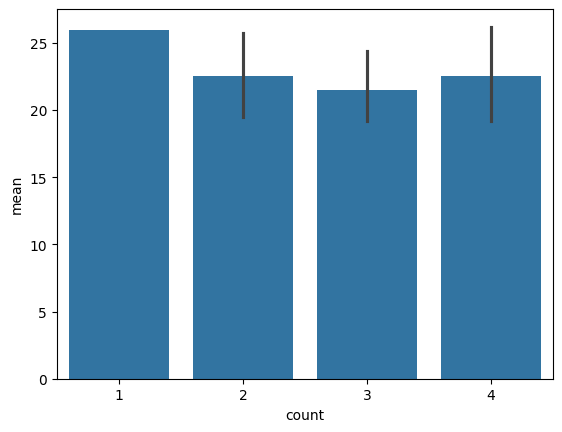

In [389]:
sns.barplot(x='count',y='mean',data=curryvsTeams)

In [390]:
traeyounggames = byGame[byGame['PLAYER_NAME'] == 'Trae Young']

<Axes: xlabel='SHOT_VALUE'>

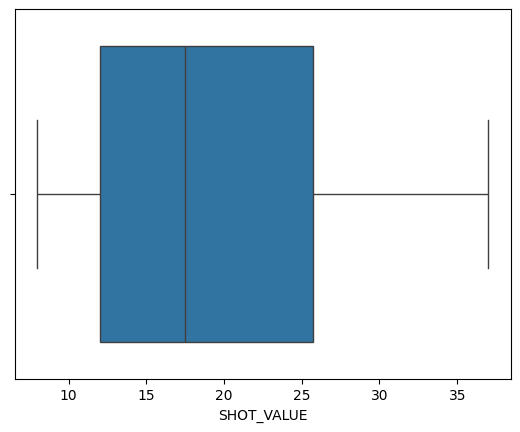

In [394]:
sns.boxplot(x='SHOT_VALUE',data=traeyounggames)

In [395]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION', 'SHOT_VALUE', 'TEAM_ABV', 'OPP_TEAM_ABV',
       'OPP_TEAM'],
      dtype='object')

In [424]:
minRemaining = df.groupby(['PERIOD','MINUTES_REMAINING'])['SHOT_MADE_FLAG'].mean().reset_index()

In [425]:
minRemaining

,PERIOD,MINUTES_REMAINING,SHOT_MADE_FLAG
0,1,0,0.420755
1,1,1,0.462231
2,1,2,0.460723
3,1,3,0.473674
4,1,4,0.487380
5,1,5,0.492604
6,1,6,0.495638
7,1,7,0.478628
8,1,8,0.492737
9,1,9,0.486948


In [426]:
minRemaining = pd.pivot_table(index='PERIOD',columns='MINUTES_REMAINING',values='SHOT_MADE_FLAG',data=minRemaining)

In [427]:
minRemaining

MINUTES_REMAINING,0,1,2,3,4,5,6,7,8,9,10,11
PERIOD,,,,,,,,,,,,
1,0.420755,0.462231,0.460723,0.473674,0.487380,0.492604,0.495638,0.478628,0.492737,0.486948,0.476500,0.461252
2,0.428770,0.489690,0.494601,0.494592,0.487866,0.472671,0.481450,0.474663,0.475838,0.480638,0.479502,0.458117
3,0.419125,0.472614,0.468622,0.461176,0.476450,0.482023,0.484228,0.500921,0.496993,0.488059,0.489485,0.494781
4,0.423876,0.463970,0.462955,0.479461,0.472630,0.472803,0.476076,0.469768,0.482005,0.470366,0.480850,0.472229
5,0.395105,0.402715,0.453659,0.447115,0.448864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.341463,0.555556,0.269231,0.206897,0.473684,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='MINUTES_REMAINING', ylabel='PERIOD'>

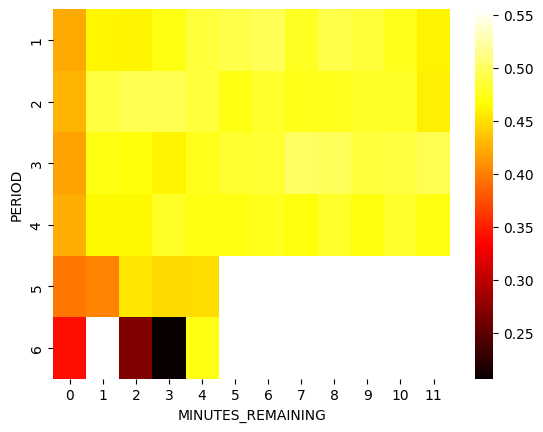

In [429]:
sns.heatmap(minRemaining,cmap='hot')

In [433]:
bydist = df.groupby('SHOT_DISTANCE')['SHOT_MADE_FLAG'].mean().reset_index()

In [434]:
bydist

,SHOT_DISTANCE,SHOT_MADE_FLAG
0,0,0.764354
1,1,0.727273
2,2,0.603567
3,3,0.504718
4,4,0.441850
...,...,...
78,78,0.000000
79,79,0.000000
80,80,0.000000
81,81,0.000000


<Axes: xlabel='SHOT_DISTANCE', ylabel='SHOT_MADE_FLAG'>

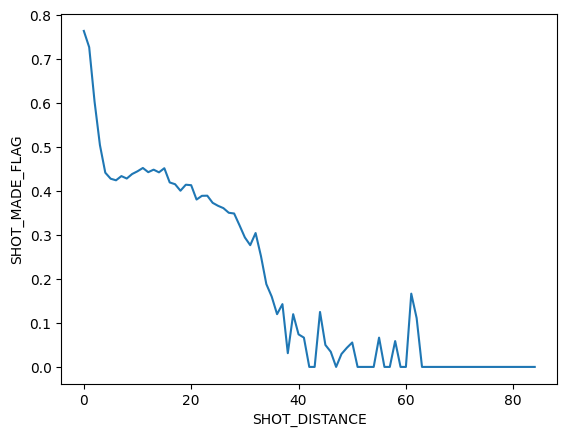

In [435]:
sns.lineplot(x='SHOT_DISTANCE',y='SHOT_MADE_FLAG',data=bydist)

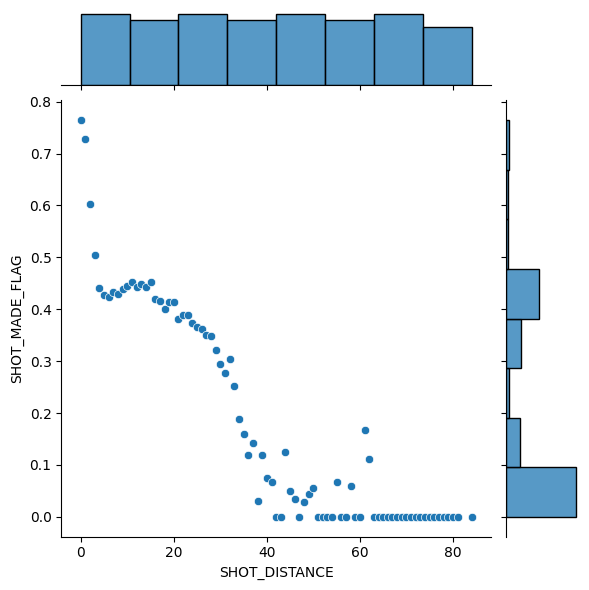

In [436]:
sns.jointplot(x='SHOT_DISTANCE',y='SHOT_MADE_FLAG',data=bydist)

In [437]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION', 'SHOT_VALUE', 'TEAM_ABV', 'OPP_TEAM_ABV',
       'OPP_TEAM'],
      dtype='object')

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data
categorical_columns = [
    'GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
    'TEAM_ID', 'TEAM_NAME', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
    'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'GAME_DATE',
    'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
    'AWAY_TEAM_NAME', 'LOCATION'
]

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Alternatively, for one-hot encoding:
# df = pd.get_dummies(df, columns=categorical_columns)


In [18]:
corr = df.select_dtypes(include='number').corr()
dfcorr = corr['SHOT_MADE_FLAG'].reset_index()
dfcorr.sort_values(by='SHOT_MADE_FLAG',inplace=True,ascending=False)
dfcorr[dfcorr['SHOT_MADE_FLAG'] > 0]

,index,SHOT_MADE_FLAG
20,SHOT_MADE_FLAG,1.000000
15,SHOT_ZONE_RANGE,0.203897
13,SHOT_ZONE_BASIC,0.190245
11,ACTION_TYPE,0.032404
8,MINUTES_REMAINING,0.020684
9,SECONDS_REMAINING,0.010485
3,PLAYER_ID,0.007971
17,LOC_X,0.007597
21,GAME_DATE,0.006607
25,Season Type,0.005679


In [25]:
dfcorr.tail(10)

,index,SHOT_MADE_FLAG
2,GAME_EVENT_ID,-0.005761
4,PLAYER_NAME,-0.007830
24,player_name,-0.007858
14,SHOT_ZONE_AREA,-0.127072
12,SHOT_TYPE,-0.176061
18,LOC_Y,-0.181514
16,SHOT_DISTANCE,-0.229163
10,EVENT_TYPE,-1.000000
0,GRID_TYPE,NaN
19,SHOT_ATTEMPTED_FLAG,NaN


In [23]:
pv = pd.pivot_table(index='index',values='SHOT_MADE_FLAG',data=dfcorr)
pv.sort_values(by='SHOT_MADE_FLAG',inplace=True,ascending=False)

<Axes: ylabel='index'>

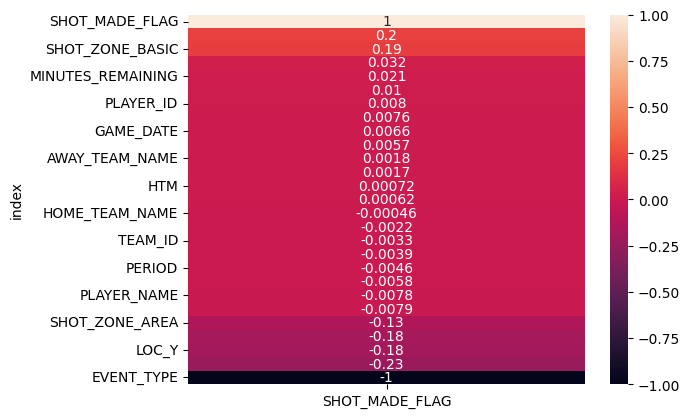

In [24]:
sns.heatmap(pv,annot=True)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and SHOT_MADE_FLAG is the target variable

# Define the target and features
X = df[['SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'TEAM_ID', 'PERIOD', 
        'MINUTES_REMAINING', 'SECONDS_REMAINING', 'PLAYER_ID', 'HTM', 'VTM']]
y = df['SHOT_MADE_FLAG']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

# Example: Random Forest for Feature Importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


/Users/ryan/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6031305768775936
              Feature  Importance
4               LOC_Y    0.130451
3               LOC_X    0.127773
8   SECONDS_REMAINING    0.127410
9           PLAYER_ID    0.119804
11                VTM    0.096984
10                HTM    0.095340
7   MINUTES_REMAINING    0.078845
5             TEAM_ID    0.078156
2       SHOT_DISTANCE    0.070276
6              PERIOD    0.044885
1     SHOT_ZONE_BASIC    0.021862
0           SHOT_TYPE    0.008213


In [32]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'player_name', 'Season Type', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION'],
      dtype='object')

In [40]:
df[['SHOT_TYPE','SHOT_MADE_FLAG','EVENT_TYPE','ACTION_TYPE','SHOT_TYPE']]

,SHOT_TYPE,SHOT_MADE_FLAG,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE
0,0,1,0,16,0
1,1,0,1,15,1
2,1,0,1,15,1
3,0,1,0,3,0
4,1,0,1,15,1
...,...,...,...,...,...
232536,0,1,0,36,0
232537,0,0,1,42,0
232538,0,1,0,13,0
232539,0,0,1,15,0


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Assuming df is your DataFrame and SHOT_MADE_FLAG is the target variable

# Define the target and features
X = df[['SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'TEAM_ID', 'PERIOD', 
        'MINUTES_REMAINING', 'SECONDS_REMAINING', 'PLAYER_ID', 'HTM', 'VTM']]
# X = df.drop(columns=['SHOT_MADE_FLAG','SHOT_TYPE','SHOT_ATTEMPTED_FLAG','EVENT_TYPE'])
y = df['SHOT_MADE_FLAG']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Logistic Regression Model
log_model = LogisticRegression(max_iter=100000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test,log_preds))
print(confusion_matrix(y_test,log_preds))

Logistic Regression Accuracy: 0.6186329527618311
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     24384
           1       0.63      0.47      0.54     22125

    accuracy                           0.62     46509
   macro avg       0.62      0.61      0.61     46509
weighted avg       0.62      0.62      0.61     46509

[[18431  5953]
 [11784 10341]]


In [ ]:
probs = log_model.predict_proba(y_test)

probs.